**Assignment - 04**

In [1]:
# UI22EC02 - Adarsh Singh

# importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Generation

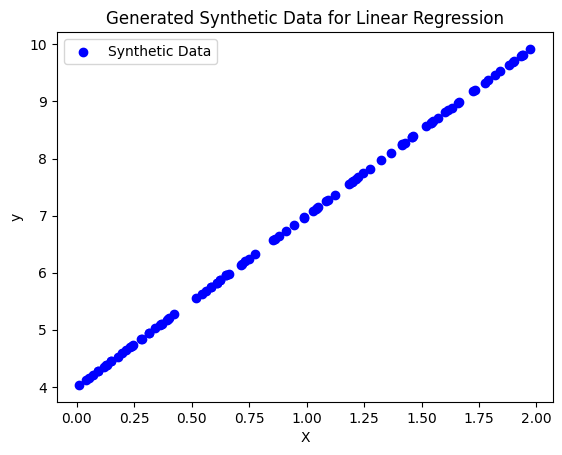

In [5]:
# Generation of synthetic data

np.random.seed(42)
n = 100
x = 2 * np.random.rand(n, 1)
m = 3
c = 4
noise = np.random.randn(n, 1) * 0.5

# Plot

y = m * x + c
df = pd.DataFrame({"X": x.flatten(), "Y": y.flatten()})

# converting data to csv fomat
df.to_csv("syntheticData.csv", index = False)

plt.scatter(x, y, color='blue', label="Synthetic Data")
plt.title("Generated Synthetic Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

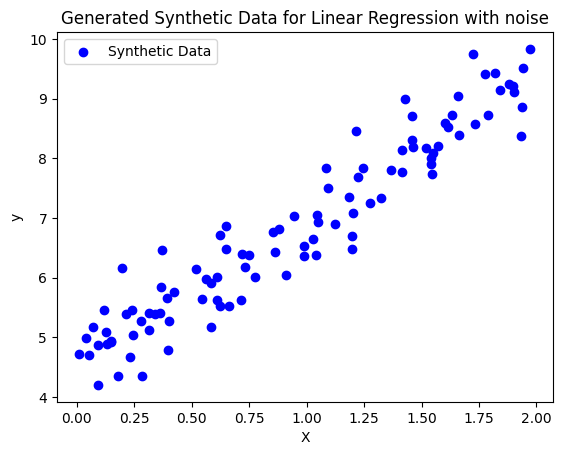

In [24]:
# Added noise

y = m * x + c + noise

# Plot
# b) Single Variable Plot

plt.scatter(x, y, color='blue', label="Synthetic Data")
plt.title("Generated Synthetic Data for Linear Regression with noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



 Multiple variable plot

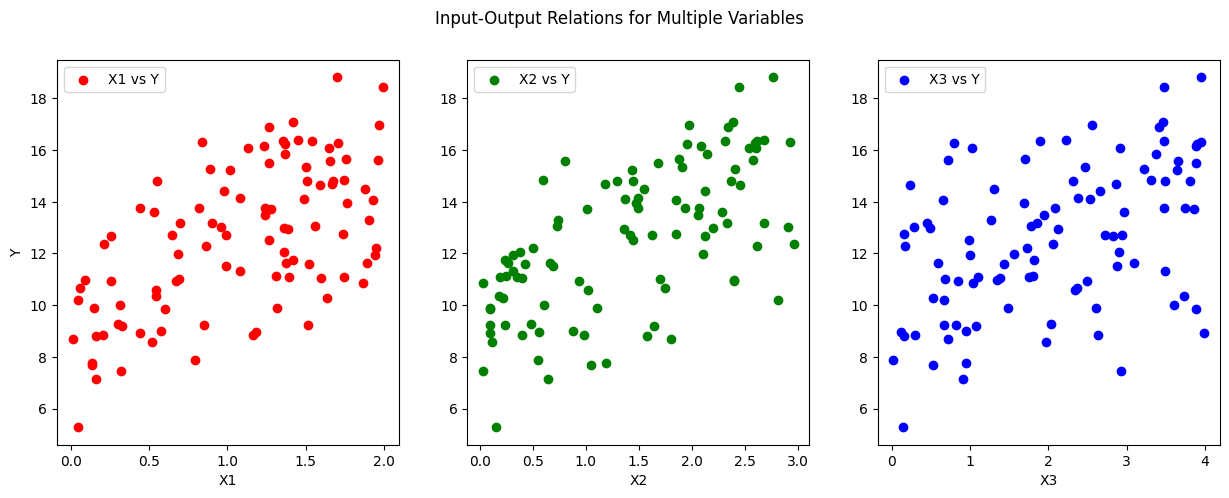

In [27]:
# multiple independent variables (features)

X1 = 2 * np.random.rand(n, 1)
X2 = 3 * np.random.rand(n, 1)
X3 = 4 * np.random.rand(n, 1)

m1, m2, m3 = 3, 2, 1

# eqn
Y = m1 * X1 + m2 * X2 + m3 * X3 + c + noise

df_multi = pd.DataFrame({"X1": X1.flatten(), "X2": X2.flatten(), "X3": X3.flatten(), "Y": Y.flatten()})

# data to csv file
df_multi.to_csv("syntheticMultiData.csv", index=False)

# plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X1, Y, color='red', label="X1 vs Y")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("Y")
axs[0].legend()

axs[1].scatter(X2, Y, color='green', label="X2 vs Y")
axs[1].set_xlabel("X2")
axs[1].legend()

axs[2].scatter(X3, Y, color='blue', label="X3 vs Y")
axs[2].set_xlabel("X3")
axs[2].legend()

plt.suptitle("Input-Output Relations for Multiple Variables")
plt.show()

(c) Linear regression using:

1) Normal Equation
2) Formulation
3) Gradient Descent




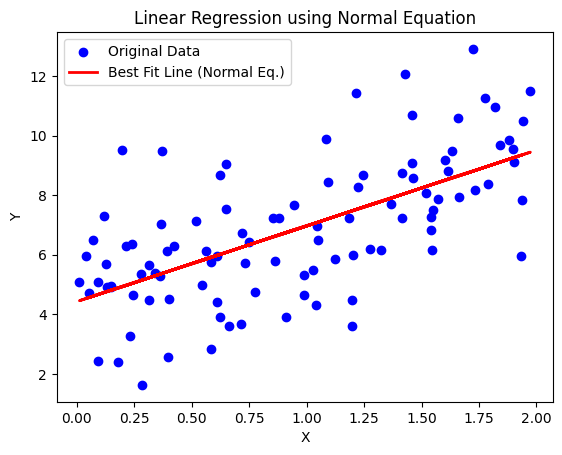

In [23]:
# using normal equation



# Add a column of ones to X for the bias term (intercept)
X_b = np.c_[np.ones((x.shape[0], 1)), x]  # Add x0 = 1

# Compute theta using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict values using theta
y_pred = X_b.dot(theta_best)

# Plot the best-fit line'

plt.scatter(x, y, color='blue', label="Original Data")
plt.plot(x, y_pred, color='red', linewidth=2, label="Best Fit Line (Normal Eq.)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Normal Equation")
plt.show()


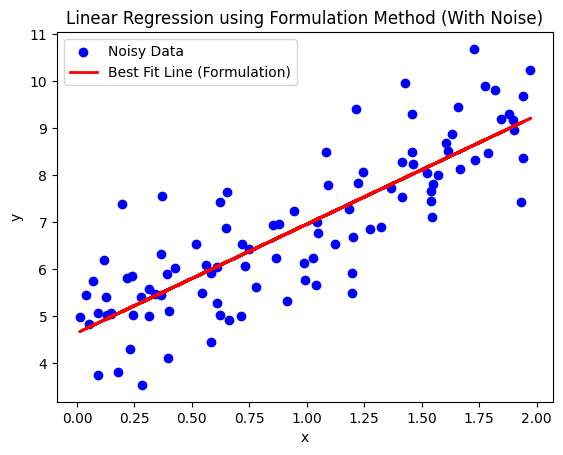

Estimated Slope (m): 2.3103401593154524
Estimated Intercept (c): 4.645288472640244


In [28]:
# using formulation

# mean of x and y (with noise)
x_mean = np.mean(x)
y_mean = np.mean(y)  # y already includes noise

# slope (m) using formulation method
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# intercept (c)
c = y_mean - m * x_mean

# predicting the values using the best-fit line
y_pred = m * x + c

# plt of i/p data (noisy)
plt.scatter(x, y, color='blue', label="Noisy Data")

# plt of the single best-fit line
plt.plot(x, y_pred, color='red', linewidth=2, label="Best Fit Line (Formulation)")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Formulation Method (With Noise)")
plt.show()

# estimated values
print(f"Estimated Slope (m): {m}")
print(f"Estimated Intercept (c): {c}")


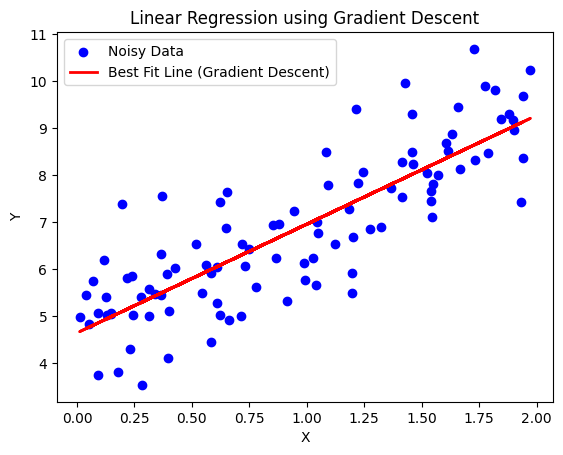

Estimated Intercept (theta0): 4.6452884187145
Estimated Slope (theta1): 2.3103402069289536


In [32]:
# using gradient descent

# Initialize parameters
theta0 = 0  # Intercept (bias)
theta1 = 0  # Slope
alpha = 0.1  # Learning rate
epochs = 1000  # Number of iterations
m = len(x)  # Number of training examples

# Gradient Descent Loop
for _ in range(epochs):
    y_pred = theta0 + theta1 * x  # Predictions
    error = y_pred - y  # Error

    # Compute gradients
    theta0 -= alpha * (1/m) * np.sum(error)  # Update intercept
    theta1 -= alpha * (1/m) * np.sum(error * x)  # Update slope

# Predicting using final theta values
y_pred_final = theta0 + theta1 * x

# Plt
plt.scatter(x, y, color='blue', label="Noisy Data")  # Fixed label
plt.plot(x, y_pred_final, color='red', linewidth=2, label="Best Fit Line (Gradient Descent)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()

# Print final estimated values
print(f"Estimated Intercept (theta0): {theta0}")
print(f"Estimated Slope (theta1): {theta1}")


Comparison of all three methods

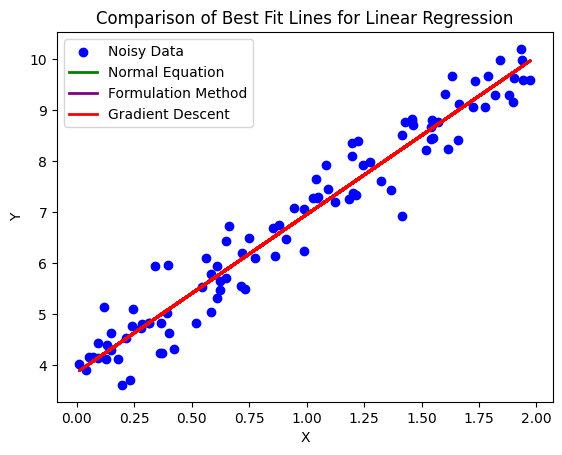

Mean Squared Error (Normal Equation): 0.2006
Mean Squared Error (Formulation): 0.2006
Mean Squared Error (Gradient Descent): 0.2006


In [33]:

# dataset
df = pd.read_csv("syntheticData.csv")
x = df["X"].values.reshape(-1, 1)
y = df["Y"].values.reshape(-1, 1)

# noise
np.random.seed(42)
noise = np.random.randn(len(x), 1) * 0.5
y_noisy = y + noise

# ------------ 1️⃣ Normal Equation ------------
X_b = np.c_[np.ones((len(x), 1)), x]  # Add bias term
theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_noisy  # Normal Equation
y_pred_normal = X_b @ theta_normal
mse_normal = np.mean((y_noisy - y_pred_normal) ** 2)

# ------------ 2️⃣ Formulation Method ------------
x_mean = np.mean(x)
y_mean = np.mean(y_noisy)
m_formulation = np.sum((x - x_mean) * (y_noisy - y_mean)) / np.sum((x - x_mean) ** 2)
c_formulation = y_mean - m_formulation * x_mean
y_pred_formulation = m_formulation * x + c_formulation
mse_formulation = np.mean((y_noisy - y_pred_formulation) ** 2)

# ------------ 3️⃣ Gradient Descent ------------
theta0 = 0  # Intercept
theta1 = 0  # Slope
alpha = 0.1  # Learning rate
epochs = 1000  # Iterations
m = len(x)

for _ in range(epochs):
    y_pred = theta0 + theta1 * x
    error = y_pred - y_noisy
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * x)

y_pred_gd = theta0 + theta1 * x
mse_gd = np.mean((y_noisy - y_pred_gd) ** 2)

# ------------ Plotting ------------
plt.scatter(x, y_noisy, color='blue', label="Noisy Data")
plt.plot(x, y_pred_normal, color='green', linewidth=2, label="Normal Equation")
plt.plot(x, y_pred_formulation, color='purple', linewidth=2, label="Formulation Method")
plt.plot(x, y_pred_gd, color='red', linewidth=2, label="Gradient Descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Comparison of Best Fit Lines for Linear Regression")
plt.show()

# ------------ Print MSE Values ------------
print(f"Mean Squared Error (Normal Equation): {mse_normal:.4f}")
print(f"Mean Squared Error (Formulation): {mse_formulation:.4f}")
print(f"Mean Squared Error (Gradient Descent): {mse_gd:.4f}")
